### Setup and Data Loading

In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

base = os.path.dirname(os.path.abspath("__file__"))

# Load and preprocess data
def load_data(base_path, csv_path):
    csv_path = base + csv_path
    data = pd.read_csv(csv_path)
    images = []
    labels = []
    for _, row in data.iterrows():
        image_path = os.path.join(base_path, row['Path'])
        image = Image.open(image_path)
        image = image.resize((32, 32))
        image = img_to_array(image)
        images.append(image)
        labels.append(row['ClassId'])
    images = np.array(images, dtype='float32')
    labels = np.array(labels)
    return images, labels

train_path = 'datasets/'
test_path = 'datasets/'
train_csv = '/datasets/Train.csv'
test_csv = '/datasets/Test.csv'

X_train, y_train = load_data(train_path, train_csv)
X_test, y_test = load_data(test_path, test_csv)

X_train, X_test = X_train / 255.0, X_test / 255.0
y_train = to_categorical(y_train, num_classes=43)
y_test = to_categorical(y_test, num_classes=43)

### Visualize Sample Images

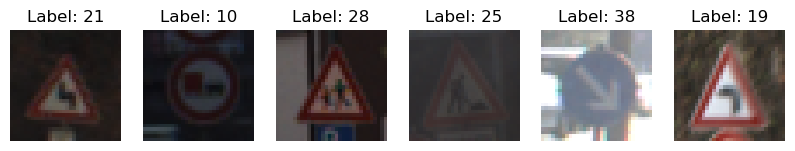

In [2]:
import matplotlib.pyplot as plt

# Visualize sample images
def show_sample_images(images, labels, num_samples=6):
    random_indices = np.random.choice(images.shape[0], num_samples, replace=False)
    fig, axes = plt.subplots(1, num_samples, figsize=(10, 2))
    for i, idx in enumerate(random_indices):
        ax = axes[i]
        ax.imshow(images[idx])
        ax.set_title(f'Label: {np.argmax(labels[idx])}')
        ax.axis('off')
    plt.show()

show_sample_images(X_train, y_train)

### Build the Model

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(43, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Train the Model

In [4]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.7690 - loss: 0.8983 - val_accuracy: 0.9437 - val_loss: 0.1902
Epoch 2/10
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - accuracy: 0.9843 - loss: 0.0592 - val_accuracy: 0.9260 - val_loss: 0.2628
Epoch 3/10
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 38s 31ms/step - accuracy: 0.9887 - loss: 0.0404 - val_accuracy: 0.9557 - val_loss: 0.1572
Epoch 4/10
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - accuracy: 0.9891 - loss: 0.0379 - val_accuracy: 0.9540 - val_loss: 0.1692
Epoch 5/10
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 39s 32ms/step - accuracy: 0.9927 - loss: 0.0226 - val_accuracy: 0.9614 - val_loss: 0.1256
Epoch 6/10
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - accuracy: 0.9951 - loss: 0.0172 - val_accuracy: 0.9515 - val_loss: 0.1771
Epoch 7/10
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 43s 35ms/step - accuracy: 0.9933 - loss: 0.0192 - val_accuracy: 0.9466 - val_loss: 0.2290
Epoch 8/10
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.9924 -

### Plot Training History

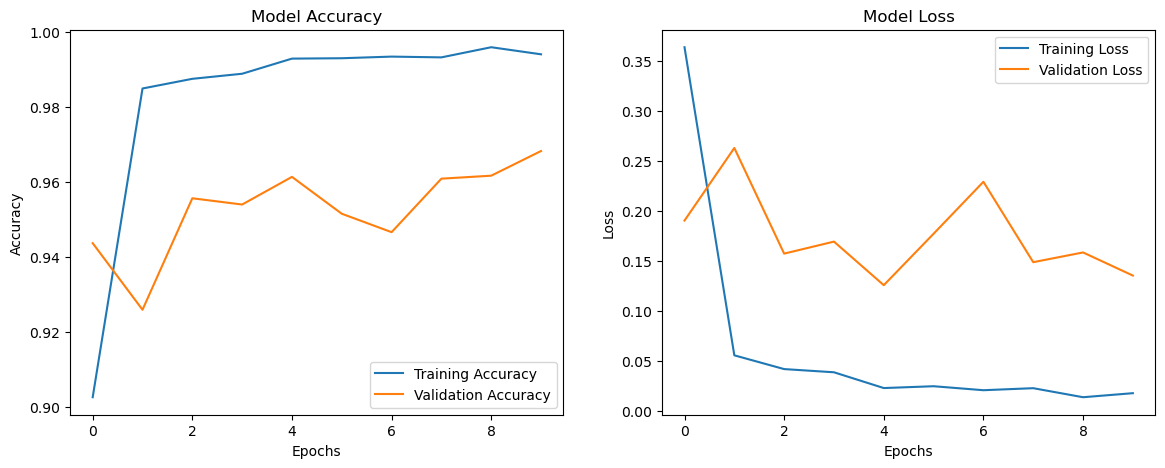

In [5]:
import matplotlib.pyplot as plt

# Plot training history
def plot_training_history(history):
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_training_history(history)

### Save the Trained Model

In [12]:
model.save('build/traffic_sign_model3.keras')

### Plot Confusion Matrix

395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


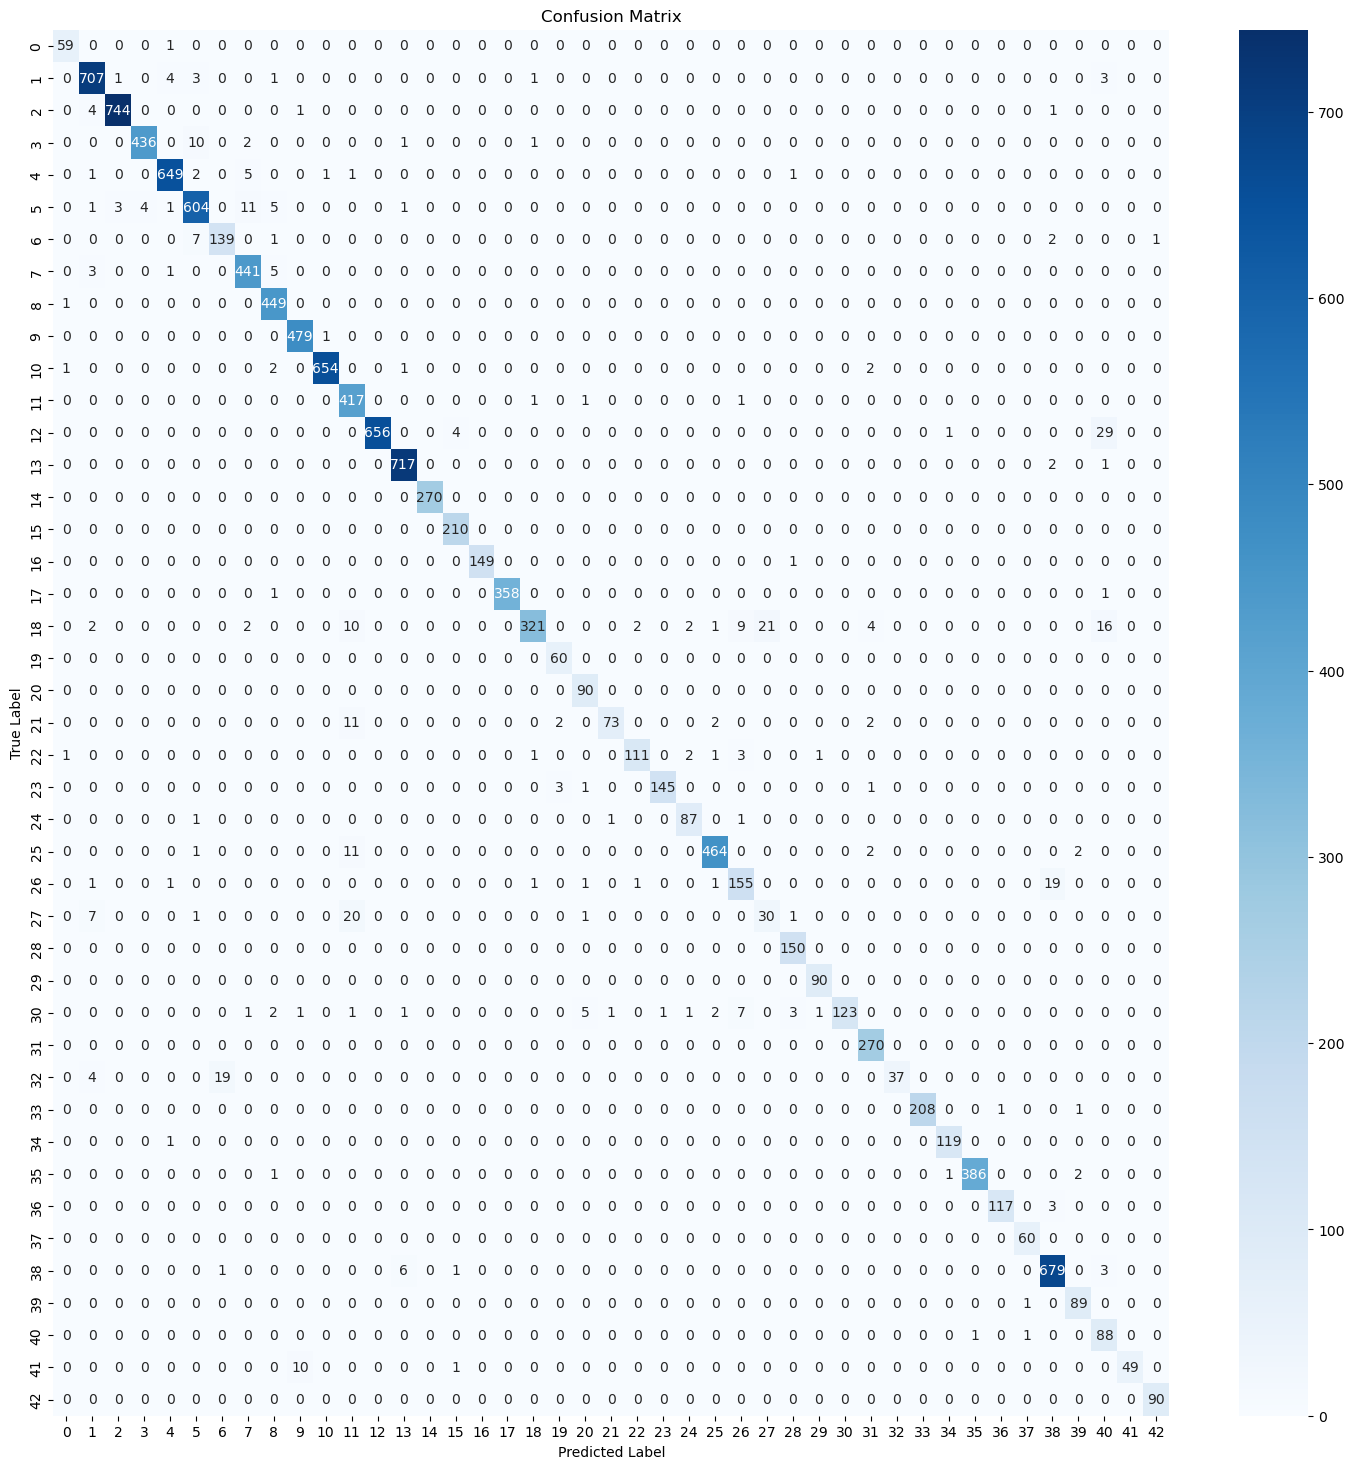

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(18, 18))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
plot_confusion_matrix(y_true, y_pred_classes, classes=np.arange(43))

### Plot Feature Maps

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


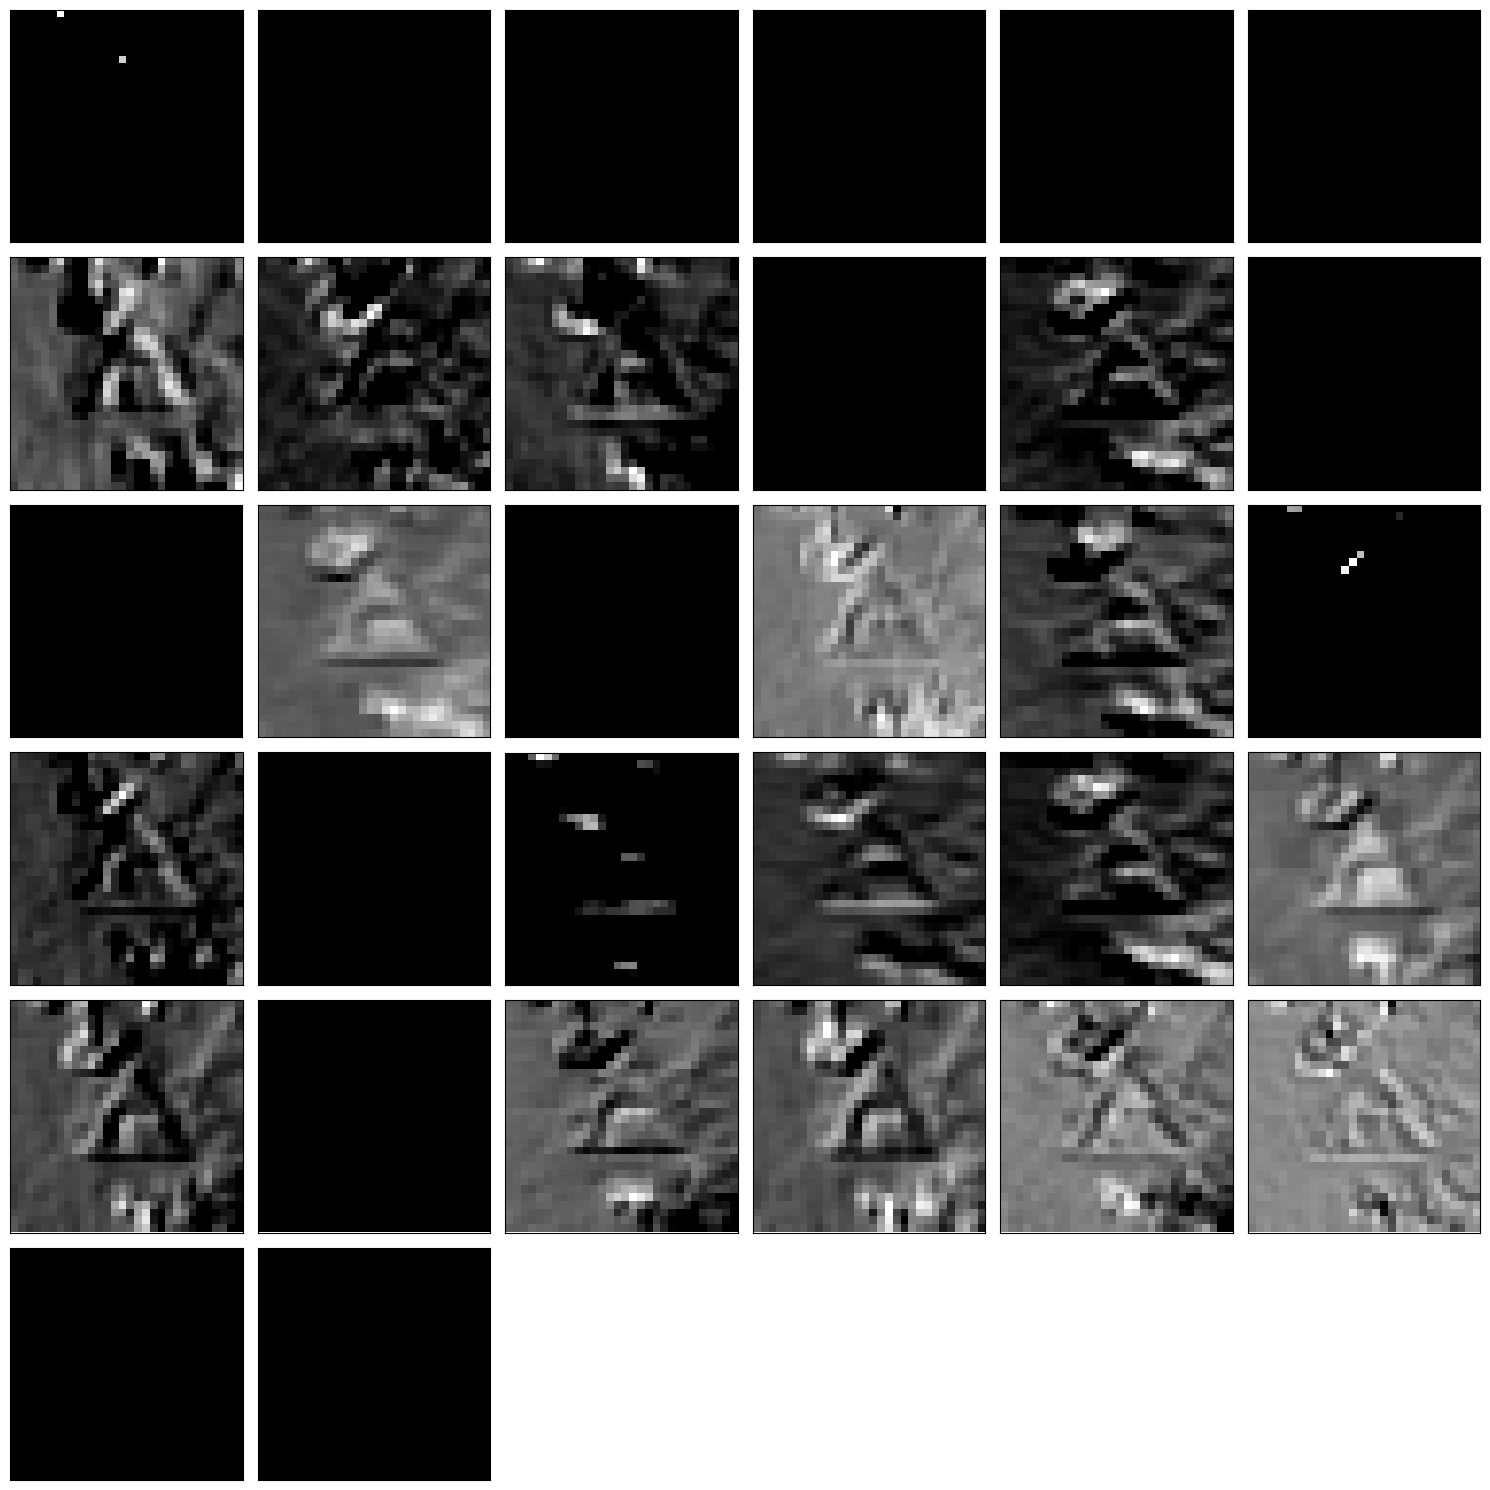

In [8]:
from tensorflow.keras.models import Model

# Plot feature maps
def plot_feature_maps(model, layer_id, image_input):
    model = Model(inputs=model.inputs, outputs=model.layers[layer_id].output)
    feature_maps = model.predict(image_input)
    num_maps = feature_maps.shape[-1]
    square = int(np.sqrt(num_maps)) + 1

    plt.figure(figsize=(15, 15))
    for i in range(1, num_maps + 1):
        ax = plt.subplot(square, square, i)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(feature_maps[0, :, :, i - 1], cmap='gray')
    plt.tight_layout()
    plt.show()

image_input = np.expand_dims(X_train[0], axis=0)
plot_feature_maps(model, layer_id=1, image_input=image_input)

### Plot Filters

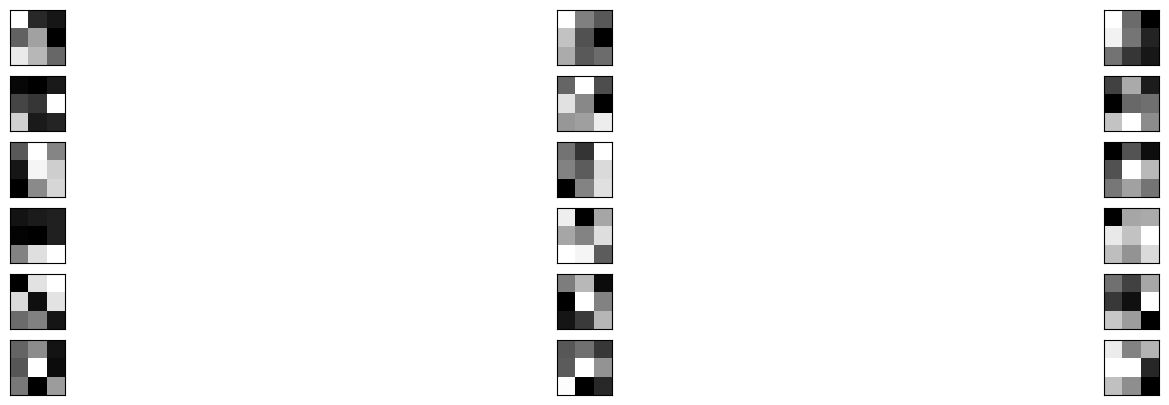

In [9]:
# Plot filters
def plot_filters(layer):
    filters, biases = layer.get_weights()
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)

    n_filters, ix = 6, 1
    plt.figure(figsize=(20, 5))
    for i in range(n_filters):
        f = filters[:, :, :, i]
        for j in range(3):
            ax = plt.subplot(n_filters, 3, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            plt.imshow(f[:, :, j], cmap='gray')
            ix += 1
    plt.show()

plot_filters(model.layers[0])

### Evaluate the Model on Test Data

In [11]:
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import numpy as np
from tensorflow.keras.utils import to_categorical

# Load the model
model_path = 'build/_traffic_sign_model.keras'
model = load_model(model_path)

# Load the CSV file
data_df = pd.read_csv('datasets/Test.csv')
num_classes = 43
test_datagen = ImageDataGenerator(rescale=1./255)

# Generate test data
def generate_data(dataframe, batch_size):
    while True:
        for i in range(0, len(dataframe), batch_size):
            batch_data = dataframe.iloc[i:i+batch_size]
            images = []
            labels = []
            for _, row in batch_data.iterrows():
                img_path = 'datasets/' + row['Path']
                img = image.load_img(img_path, target_size=(32, 32))
                img = image.img_to_array(img)
                img = test_datagen.standardize(img)
                images.append(img)
                labels.append(to_categorical(row['ClassId'], num_classes=num_classes))
            images = np.array(images)
            labels = np.array(labels)
            yield images, labels

test_generator = generate_data(data_df, batch_size=32)

# Evaluate the model
steps = len(data_df) // 32
loss, accuracy = model.evaluate(test_generator, steps=steps)
print(f'Test Accuracy: {accuracy*100:.2f}%')

394/394 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9577 - loss: 0.1804
Test Accuracy: 95.87%
